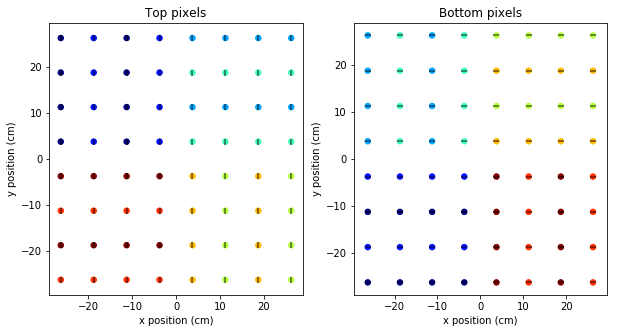

In [1]:
## See http://simonsobservatory.wikidot.com/instrument-systmodule for more informations.
from instrument import hardware
import numpy as np

## Generate a focal plane with 4 Crate boards, each with 1 MUX board, 
## each with 1 Squid, each with 16 pairs of bolometers.
## The focal plane is 60 cm wide (square).
inst = hardware(ncrate=4, ndfmux_per_crate=1,
                nsquid_per_mux=1, npair_per_squid=16,
                fp_size=60., geometry='square',
                output_folder='./', name='test', debug=False)

## Let's have a look at our wonderful focal plane.
fp = inst.focal_plane
## The colorcode corresponds to the value of the polarisation angle.
fp.show_hwmap(fp.output_file, save_on_disk=False, display=True)

In [2]:
## One can also access the properties of the focal plane
## This is particularly useful if you want to interface with your pipeline

print('Bolometer properties')
print(fp.read_hwmap(fp.output_file, 'Bolometer'))
print('')
print('Bolometer (id, x coord, y coord)')
print(zip(fp.unpack_hwmap(fp.output_file, 'Bolometer', 'id'),
          fp.unpack_hwmap(fp.output_file, 'Bolometer', 'xCoordinate'),
          fp.unpack_hwmap(fp.output_file, 'Bolometer', 'yCoordinate'))[0:4])

Bolometer properties
[['xCoordinate', 'focalPlaneIndex', 'yCoordinate', 'polangle_orientation', 'polarizationMode', 'polarizationOrientation', 'id', 'channel']]

Bolometer (id, x coord, y coord)
[('Cr0Df0Sq0_0t', '-26.2500', '-26.2500'), ('Cr0Df0Sq0_0b', '-26.2500', '-26.2500'), ('Cr0Df0Sq0_1t', '-26.2500', '-18.7500'), ('Cr0Df0Sq0_1b', '-26.2500', '-18.7500')]


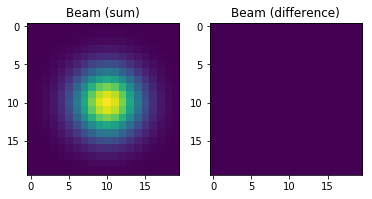

In [29]:
## Let's have a look at our beam parameters now
## Let's first plot the resulting beam map for a pixel in the focal plane
import pylab as pl
bprm = inst.beam_parameters
summap, diffmap = bprm.show_beammap(bprm.beamprm, 0, 1, 20, 0.5 / 180. * np.pi / 60.)
fig, ax = pl.subplots(1,2)
ax[0].imshow(summap, vmin=0, vmax=1)
ax[0].set_title('Beam (sum)')
ax[1].imshow(diffmap, vmin=0, vmax=1e-10)
ax[1].set_title('Beam (difference)')
pl.show()

In [ ]:
## As expected, the difference beam is zero (the two detector beams are identical for the moment)
## We will see later how to perturbed the beams, and generate spurious signals from beam mismatch.